**Note**: The Python code must be ignored until the first lab.

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

np.set_printoptions(precision=3, linewidth=150, suppress=True)
plt.style.use(['seaborn-whitegrid','data/cours.mplstyle'])

In [2]:
def arrow2D(a,b, color='k', text="", **kargs):
    astyle = matplotlib.patches.ArrowStyle("simple", head_length=.8, head_width=.8, tail_width=.1)
    plt.plot([a[0],b[0]], [a[1],b[1]] ,visible = False) # to define the visible windows
    a,b = np.array(a), np.array(b)
    plt.annotate("", xytext=a, xy=b, 
                 arrowprops=dict(arrowstyle=astyle, shrinkA=0, shrinkB=0, aa=True, color=color, **kargs))
    direction = (b - a) / np.sqrt(np.square(b - a).sum())
    plt.text(*(b + 0.1 * direction), r"$\bf" + text + r"$", horizontalalignment='center', size=14)
    
def vector(v, color='k', text='', **kargs):
    arrow2D([0,0], v, color, text)

# Vector

A vector is

* an arrow that indicates a direction and whose length measures an intensity (physicist's vision)
* a table with 2 values in 2D or 3 in 3D (computer vision)
* a concept that verifies certain properties (mathematician's view)

As part of this course we focus on the first 2 visions and we add

* a vector at its origin at (0,0)

From a typographical point of view, vectors are denoted with an arrow $\vec v$ or in bold $\bf v$. We will use this last notation in this course. A vector function (which returns a vector) is denoted as a $\bf f(\,)$.

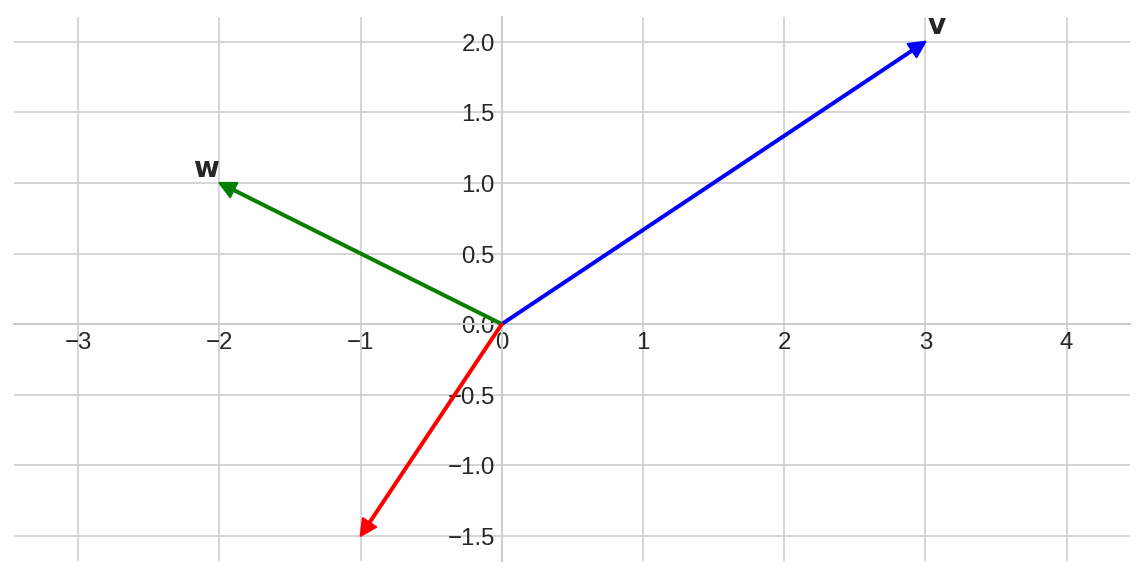

In [3]:
vector([3,2], 'b', "v")
vector([-2,1], 'g',  "w")
vector([-1,-1.5], 'r')
plt.gca().spines[:].set_position('zero')
plt.axis('equal');

The basic vector operations are

* addition
$$ \begin{bmatrix}
   v_1 \\
   v_2
   \end{bmatrix} 
   +
   \begin{bmatrix}
   w_1 \\
   w_2
   \end{bmatrix} 
   = 
   \begin{bmatrix}
   v_1 + w_1 \\
   v_2 + w_2
   \end{bmatrix} 
$$
* multiplication by a scalar:
$$
   α \,
   \begin{bmatrix}
   w_1 \\
   w_2
   \end{bmatrix} 
   =
   \begin{bmatrix}
   α \, w_1 \\
   α \, w_2
   \end{bmatrix} 
$$

Of course vectors exist in 3D and in any dimension.

# Matrices and linear maps

The matrices are

* a representation of a linear map (mathematician's vision)
* a 2D table (vision of a computer scientist who didn't understand everything)
* a very practical tool to do many things

A ${\bf f}$ map or transformation is said to be linear if it satisfies:

* ${\bf f(v)} + {\bf f(w)} = {\bf f(v + w)}$
* ${\bf f}(α \, {\bf v}) = α \, {\bf f(v)}$ with α a scalar.

This offers 2 properties:

* the origin (0,0) stays at (0,0)
* any line remains a line after its transformation by a linear map.

To define a linear map, it suffices to indicate how the base is transformed:

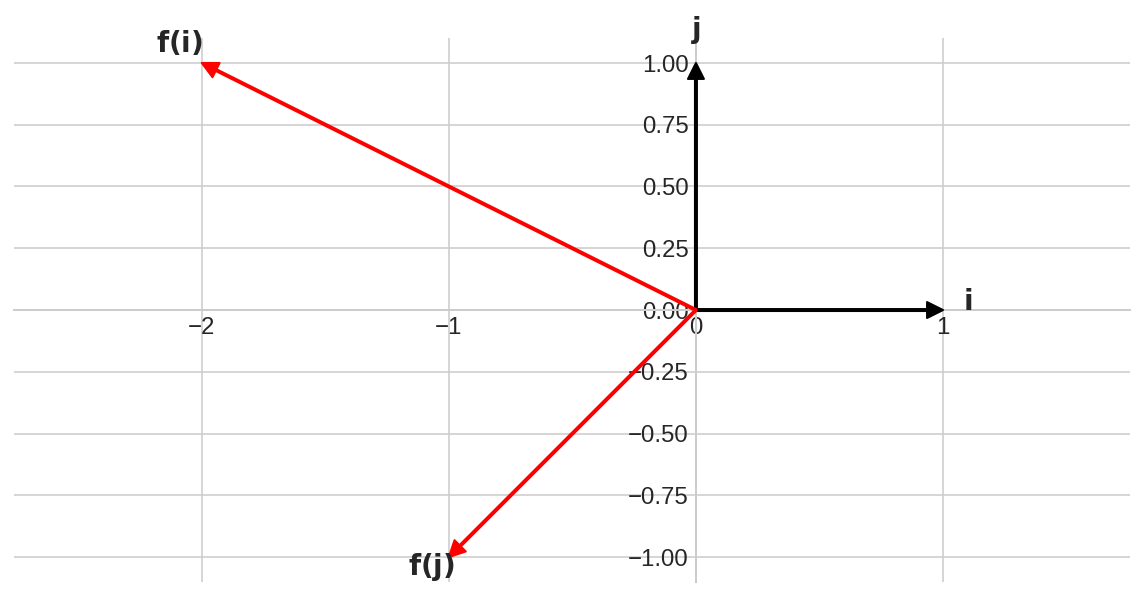

In [4]:
# base d'origine
vector([1,0], text='i')
vector([0,1], text='j')
# base transformée
vector([-2,1], 'r', 'f(i)')
vector([-1,-1], 'r', 'f(j)')
plt.gca().spines[:].set_position('zero')
plt.axis('equal');

For any vector ${\bf v}$ we have

$$ {\bf f(v)} = {\bf f}( v_1 \, {\bf i} + v_2 \, {\bf j}) = v_1 \, {\bf f(i)} + v_2 \, {\bf f(j)} $$

since $\bf f$ is linear. This shows that it is enough to know the transformation of the base.

Carrying out the calculations, we have in the case of the figure above

$$  
v_1 \, {\bf f(i)} + v_2 \, {\bf f(j)} = 
v_1 \,
\begin{bmatrix}
   -2 \\
   1
\end{bmatrix} 
+
v_2 \,
\begin{bmatrix}
   -1 \\
   -1
\end{bmatrix} 
=
\begin{bmatrix}
   -2 \, v_1 \\
   1 \, v_1 
\end{bmatrix} 
+
\begin{bmatrix}
   -1 \, v2\\
   -1 \, v2
\end{bmatrix} 
=
\begin{bmatrix}
   -2 \, v_1 -1 \, v2\\
   1 \, v_1    -1 \, v2
\end{bmatrix} 
=
\begin{bmatrix}
   -2  & -1 \\
   1   &  -1
\end{bmatrix} 
\,
\begin{bmatrix}
   v_1 \\
   v_2
\end{bmatrix} 
$$

The matrix and the matrix product are thus introduced.

The linear map $\bf f$ of our figure can therefore be represented by a matrix operation: ${\bf f}({\bf v}) =  A \, {\bf v}$ where the matrix A is

$$
A =
\begin{bmatrix}
   -2  & -1 \\
   1   &  -1
\end{bmatrix} 
$$

Note that we find $\bf f(i)$ in the first column and $\bf f(j)$ in the second column.

One will be able to check in exercise that the application ${\bf f} : {\bf v} \mapsto A \, {\bf v}$ is indeed linear.

## Determinant of a matrix

The determinant indicates the magnification of the surface of an object after transformation by $\bf f$ or, what is the same, after multiplication by A.

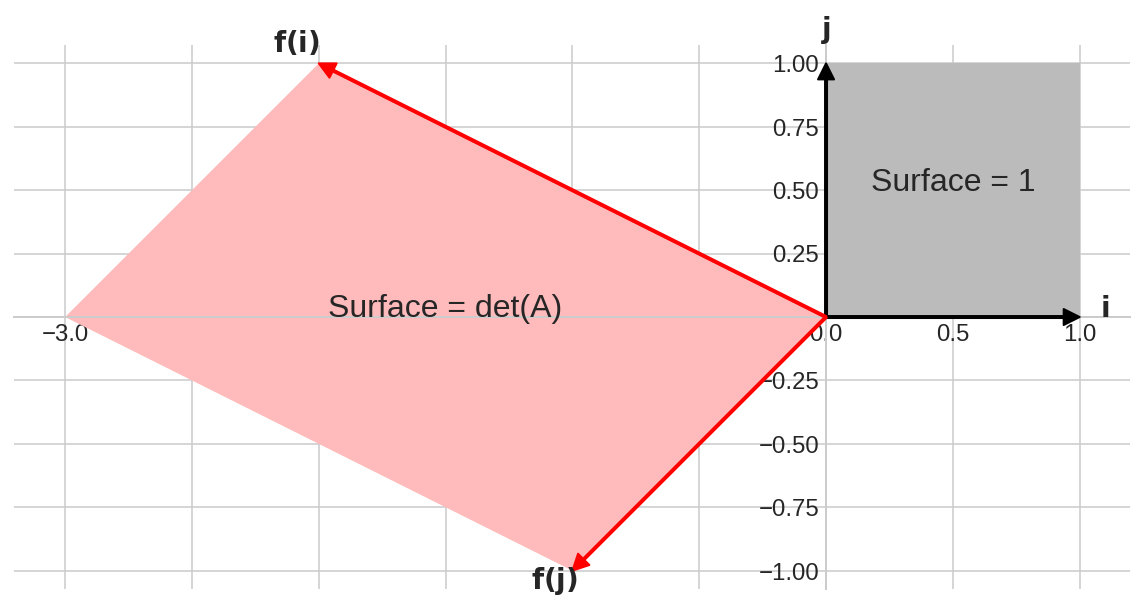

In [5]:
# base d'origine
vector([1,0], text='i')
vector([0,1], text='j')
plt.fill([0,1, 1, 0],[0,0,1,1], '#bbbbbb')
plt.text(0.5, 0.5, 'Surface = 1', horizontalalignment='center', size=16)
# base transformée
vector([-2,1], 'r', 'f(i)')
vector([-1,-1], 'r', 'f(j)')
plt.fill([0,-2, -3, -1],[0,1,0,-1], '#ffbbbb')
plt.text(-1.5, 0, 'Surface = det(A)', horizontalalignment='center', size=16)
plt.gca().spines[:].set_position('zero')
plt.axis('equal');

In [6]:
import numpy.linalg as lin

A = np.array([[-2, -1], [1, -1]])
lin.det(A)

3.0

* if det(A) = 0 then that means that $\bf f(i)$ and $\bf f(j)$ are collinear, so that we have lost a dimension (we look at the slice of the plane).
* if det(A) < 0 then that means that $\bf f(i)$ is after $\bf f(j)$ counterclockwise (we flipped the plane)

If you are not comfortable with linear algebra, I invite you to watch [the videos of 3 blues, 1 brown](https://www.youtube.com/playlist?list=PLZHQObOWTQDPD3MizzM2xVFitgF8hE_ab).

## Standards

### Norm of a vector

There are different norms, the best known being the Euclidean norm or norm 2. Its definition is:

$$
|| {\bf v} ||_2 = \sqrt{\sum_{i=1}^n v_i^2} = \sqrt{\bf v . \bf v}
$$

We also have norm 1 (also known as Manhattan):

$$
||{\bf v}||_1 = \sum_{i=1}^n |v_i|
$$

Norm n:

$$
|| {\bf v} ||_n = \left( {\sum_{i=1}^n v_i^n} \right)^{1/n}
$$

and therefore the infinite norm is the max (one must use the limits to understand why).

In [7]:
v = np.array([0.1, 1, 4, 10, 50])
print("v      =", v)
print("v¹⁰⁰   =", v**100)
print("Σ v¹⁰⁰ =", (v**100).sum())
print("ǁvǁ₁₀₀ =", (v**100).sum()**0.01)

v      = [ 0.1  1.   4.  10.  50. ]
v¹⁰⁰   = [1.000e-100 1.000e+000 1.607e+060 1.000e+100 7.889e+169]
Σ v¹⁰⁰ = 7.888609052210118e+169
ǁvǁ₁₀₀ = 50.00000000000001


### Norm of a matrix

The norm that derives from the scalar product is the **Frobenius norm**:

$$
|| A ||_F = \sqrt{\textrm{trace}(A A^*)} = \sqrt{ \sum_{1 \le i\le m \atop 1 \le j\le n}|A_{ij}|^2 }
$$

with $A^*$ the adjoint matrix (or the transpose matrix if we are in R).

In [8]:
A = np.array([[1, 1], [2, 3]])
print(A)
print("ǁAǁ = ", np.linalg.norm(A))

[[1 1]
 [2 3]]
ǁAǁ =  3.872983346207417


The **subordinate norm** is induced by the vector norm:

$$
||B||_n = \sup_{\bf v} \frac{||B\, {\bf v}||_n}{||\textbf{v}||_n} = \sup_{\textbf{v} \, t.q. ||\textbf{v}||_n = 1} ||B\, {\bf v}||_n = \sup_{\textbf{v} \, t.q. ||\textbf{v}||_n \le 1} ||B\, {\bf v}||_n
$$

This is the default norm used in this course.

In [9]:
print("ǁAǁ₂ = ", np.linalg.norm(A,2))

ǁAǁ₂ =  3.8643284505408246


### Properties

In our case, where the arrival space and the departure space are $\mathbb{R}^n$ or $\mathbb{C}^n$, norms have the following properties:
    
$$
\begin{array}{l}
|| A B || \le ||A|| \; ||B|| \\
|| A {\bf v} || \le ||A|| \; ||{\bf v}||
\end{array}
$$